## Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Import

In [2]:
file = 'DataAnalyst.csv'

# Load the CSV file directly from the link
df = pd.read_csv(file)

# Display DataFrame information
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2253 entries, 0 to 2252
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         2253 non-null   int64  
 1   Job Title          2253 non-null   object 
 2   Salary Estimate    2253 non-null   object 
 3   Job Description    2253 non-null   object 
 4   Rating             2253 non-null   float64
 5   Company Name       2252 non-null   object 
 6   Location           2253 non-null   object 
 7   Headquarters       2253 non-null   object 
 8   Size               2253 non-null   object 
 9   Founded            2253 non-null   int64  
 10  Type of ownership  2253 non-null   object 
 11  Industry           2253 non-null   object 
 12  Sector             2253 non-null   object 
 13  Revenue            2253 non-null   object 
 14  Competitors        2253 non-null   object 
 15  Easy Apply         2253 non-null   object 
dtypes: float64(1), int64(2),

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True
1,1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1
2,2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1
3,3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,-1
4,4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True


##  Data Cleaning


In [3]:
# Replace invalid values with NaN or appropriate values
df['Founded'] = df['Founded'].replace(-1, np.nan)
df['Type of ownership'] = df['Type of ownership'].replace('-1', np.nan)
df['Industry'] = df['Industry'].replace('-1', np.nan)
df['Sector'] = df['Sector'].replace('-1', np.nan)
df['Competitors'] = df['Competitors'].replace('-1', np.nan)
df['Revenue'] = df['Revenue'].replace('-1', 'Unknown / Non-Applicable')
df['Easy Apply'] = df['Easy Apply'].replace('-1', False)
df['Rating'] = df['Rating'].replace([-1, -1.0], 0.0)
df['Size'] = df['Size'].replace('-1', 'Unknown')
df['Salary Estimate'] = df['Salary Estimate'].replace('-1', '0-0')

## Creating a New Column

In [4]:
# Duplicate the "Salary Estimate" column and rename it "Average Salary"
df['Average Salary'] = df['Salary Estimate']

# Convert "K" into "000"
df['Average Salary'] = df['Average Salary'].str.replace('K', '000', regex=True)

# Remove unwanted characters
df['Average Salary'] = df['Average Salary'].str.replace('[\$, (Glassdoor est.)]', '', regex=True)

# Split into "Min Salary" and "Max Salary"
df[['Min Salary', 'Max Salary']] = df['Average Salary'].str.split('-', expand=True).astype(float)

# Calculate the average and assign it to "Average Salary"
df['Average Salary'] = ((df['Min Salary'] + df['Max Salary']) / 2).astype(int)


<>:8: SyntaxWarning: invalid escape sequence '\$'
<>:8: SyntaxWarning: invalid escape sequence '\$'
C:\Users\crist\AppData\Local\Temp\ipykernel_16532\4163392795.py:8: SyntaxWarning: invalid escape sequence '\$'
  df['Average Salary'] = df['Average Salary'].str.replace('[\$, (Glassdoor est.)]', '', regex=True)


## VISUALIZATIONS

In [5]:
# Glassdoor's color palette
glassdoor_palette = ['#0CAA41', '#00425E', '#D4E157', '#008F8C', '#C1D8C3']

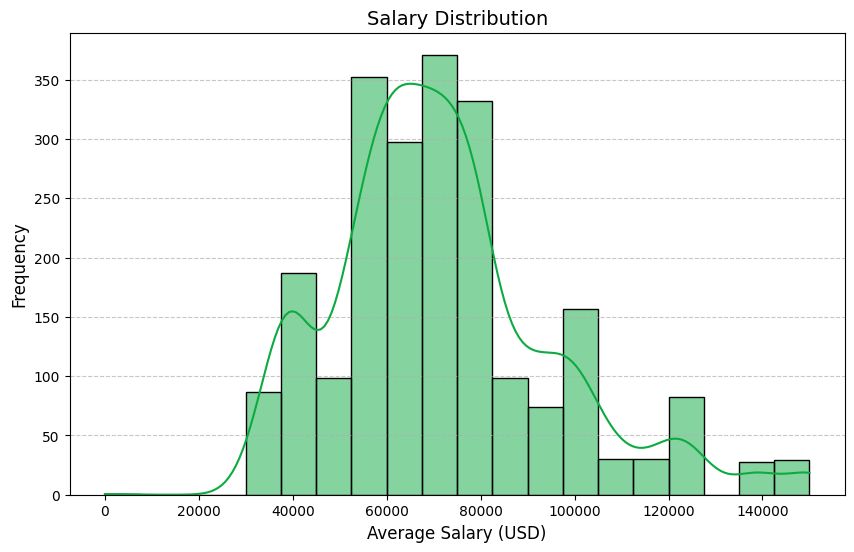

In [6]:
# 1. Salary Distribution (Histogram)
plt.figure(figsize=(10,6))
sns.histplot(df['Average Salary'], bins=20, kde=True, color=glassdoor_palette[0])
plt.title('Salary Distribution', fontsize=14)
plt.xlabel('Average Salary (USD)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

C:\Users\crist\AppData\Local\Temp\ipykernel_16532\2844511208.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=industry_salary.values, y=industry_salary.index, palette=glassdoor_palette)
C:\Users\crist\AppData\Local\Temp\ipykernel_16532\2844511208.py:4: UserWarning: 
The palette list has fewer values (5) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=industry_salary.values, y=industry_salary.index, palette=glassdoor_palette)


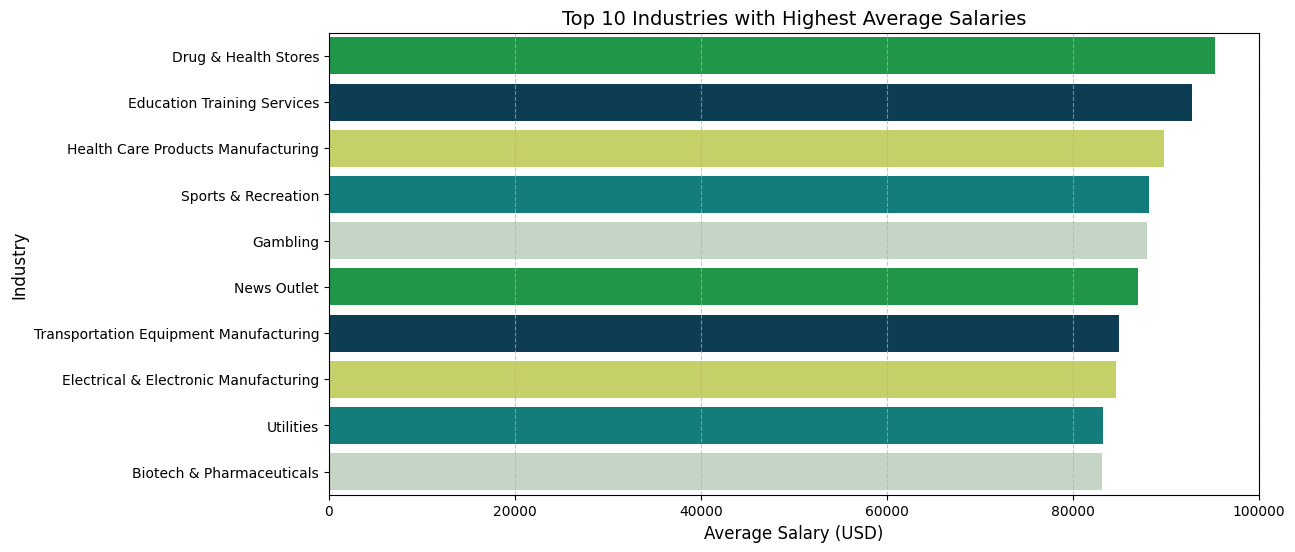

In [7]:
# 2. Top 10 Industries with Highest Salaries (Bar Chart)
plt.figure(figsize=(12,6))
industry_salary = df.groupby('Industry')['Average Salary'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=industry_salary.values, y=industry_salary.index, palette=glassdoor_palette)
plt.title('Top 10 Industries with Highest Average Salaries', fontsize=14)
plt.xlabel('Average Salary (USD)', fontsize=12)
plt.ylabel('Industry', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

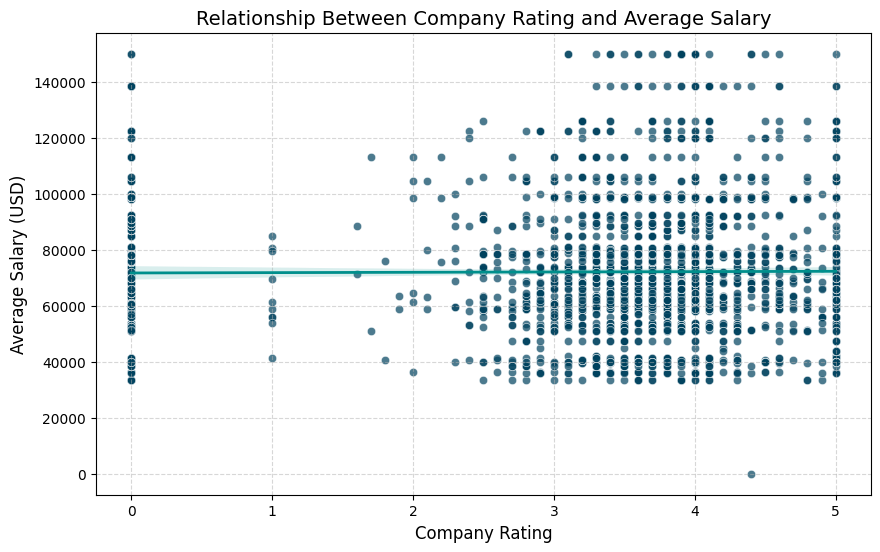

In [8]:
# 3. Relationship Between Rating and Salary (Scatter Plot)
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Rating', y='Average Salary', alpha=0.7, color=glassdoor_palette[1])
sns.regplot(data=df, x='Rating', y='Average Salary', scatter=False, color=glassdoor_palette[3], line_kws={'linewidth': 2})
plt.title('Relationship Between Company Rating and Average Salary', fontsize=14)
plt.xlabel('Company Rating', fontsize=12)
plt.ylabel('Average Salary (USD)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

C:\Users\crist\AppData\Local\Temp\ipykernel_16532\1348717270.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Easy Apply', y='Average Salary', palette=[glassdoor_palette[1], glassdoor_palette[0]])


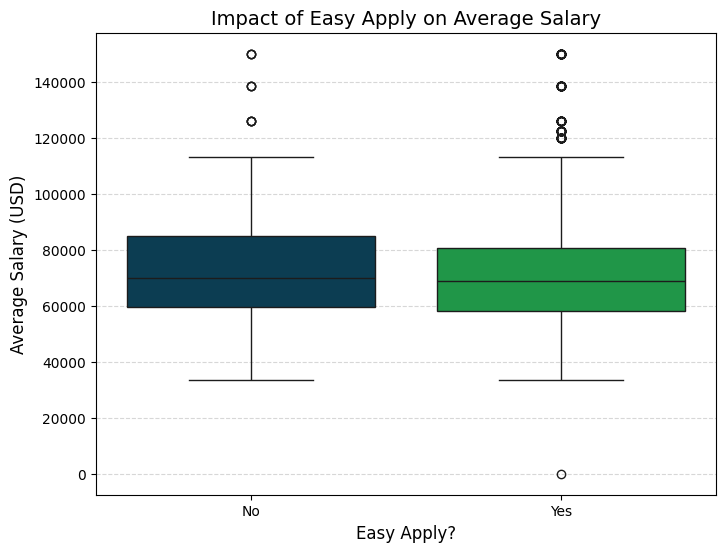

In [9]:
# 4. Impact of Easy Apply on Salary (Boxplot)
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='Easy Apply', y='Average Salary', palette=[glassdoor_palette[1], glassdoor_palette[0]])
plt.title('Impact of Easy Apply on Average Salary', fontsize=14)
plt.xlabel('Easy Apply?', fontsize=12)
plt.ylabel('Average Salary (USD)', fontsize=12)
plt.xticks([0, 1], ['No', 'Yes'])
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

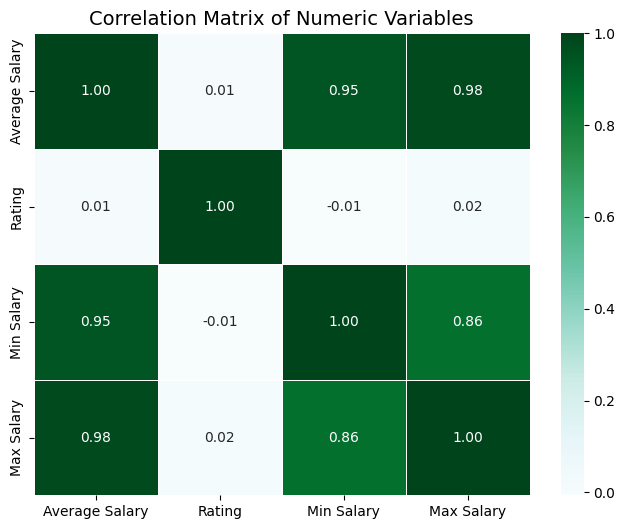

In [10]:
# 5. Correlation Matrix (Heatmap)
plt.figure(figsize=(8,6))
correlation_matrix = df[['Average Salary', 'Rating', 'Min Salary', 'Max Salary']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='BuGn', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numeric Variables', fontsize=14)
plt.show()

## Downloading the Resultant DataFrame

In [11]:
# Save the cleaned DataFrame to a CSV file
df.to_csv("clean_DF.csv", index=False)
print("File 'clean_DF.csv' saved successfully.")

File 'clean_DF.csv' saved successfully.
